# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [74]:
%matplotlib inline
%pprint off
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.io import imread, imshow
from skimage.morphology import disk
from skimage.transform import rescale
from skimage.morphology import binary_closing, binary_opening, disk, erosion, binary_dilation, binary_erosion
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle_perimeter
import numpy as np
from skimage import filters
from skimage import morphology
from skimage.morphology import rectangle

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

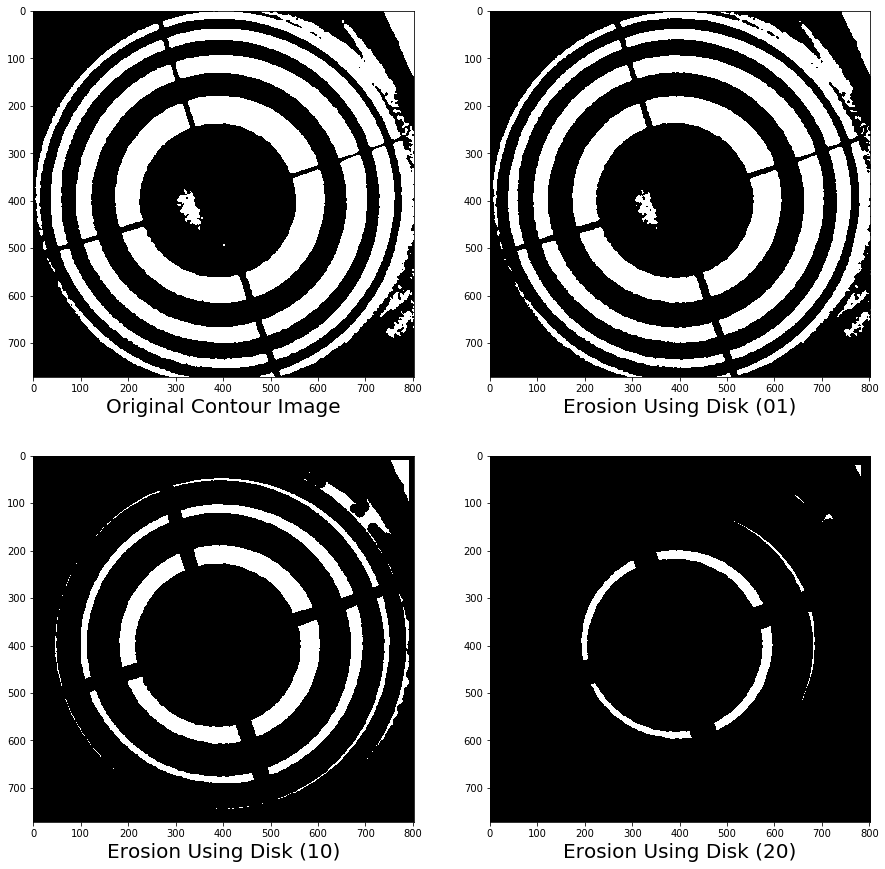

In [75]:
#import of the FindingContours's image from the devices
img_path = './images/'
img_name = 'FindingContours.png'
contour_grey_path = img_path.__add__(img_name)
Contour_grey = io.imread(contour_grey_path)

selam_01=disk(1)
selam_10=disk(10)
selam_20=disk(20)
selam_03=disk(3)

Erosion_disk_01=binary_erosion(Contour_grey,selam_01)
Erosion_disk_10=binary_erosion(Contour_grey,selam_10)
Erosion_disk_20=binary_erosion(Contour_grey,selam_20)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Erosion_disk_01,cmap='gray')
ax2.imshow(Erosion_disk_10,cmap='gray')
ax3.imshow(Erosion_disk_20,cmap='gray')

ax0.set_xlabel('Original Contour Image',fontsize=20)
ax1.set_xlabel('Erosion Using Disk (01)',fontsize=20)
ax2.set_xlabel('Erosion Using Disk (10)',fontsize=20)
ax3.set_xlabel('Erosion Using Disk (20)',fontsize=20)


** Q.1.2 Dilation **

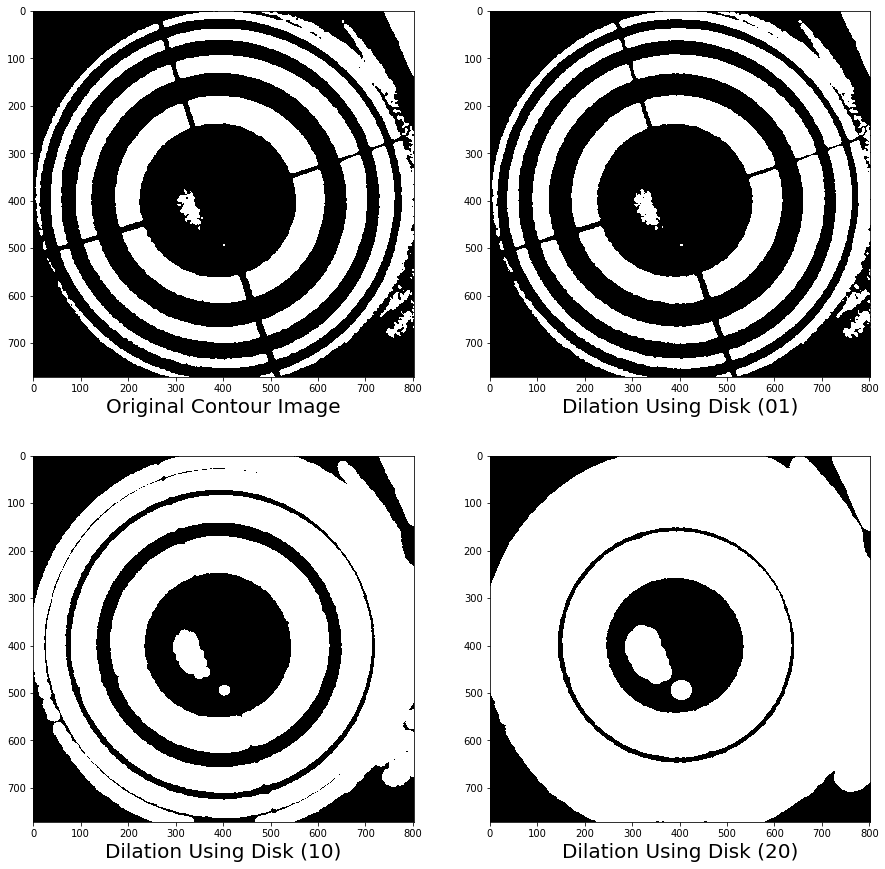

In [76]:
Dilation_disk_01=binary_dilation(Contour_grey,selam_01)
Dilation_disk_10=binary_dilation(Contour_grey,selam_10)
Dilation_disk_20=binary_dilation(Contour_grey,selam_20)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Dilation_disk_01,cmap='gray')
ax2.imshow(Dilation_disk_10,cmap='gray')
ax3.imshow(Dilation_disk_20,cmap='gray')

ax0.set_xlabel('Original Contour Image',fontsize=20)
ax1.set_xlabel('Dilation Using Disk (01)',fontsize=20)
ax2.set_xlabel('Dilation Using Disk (10)',fontsize=20)
ax3.set_xlabel('Dilation Using Disk (20)',fontsize=20)

** Q.1.3 Opening **

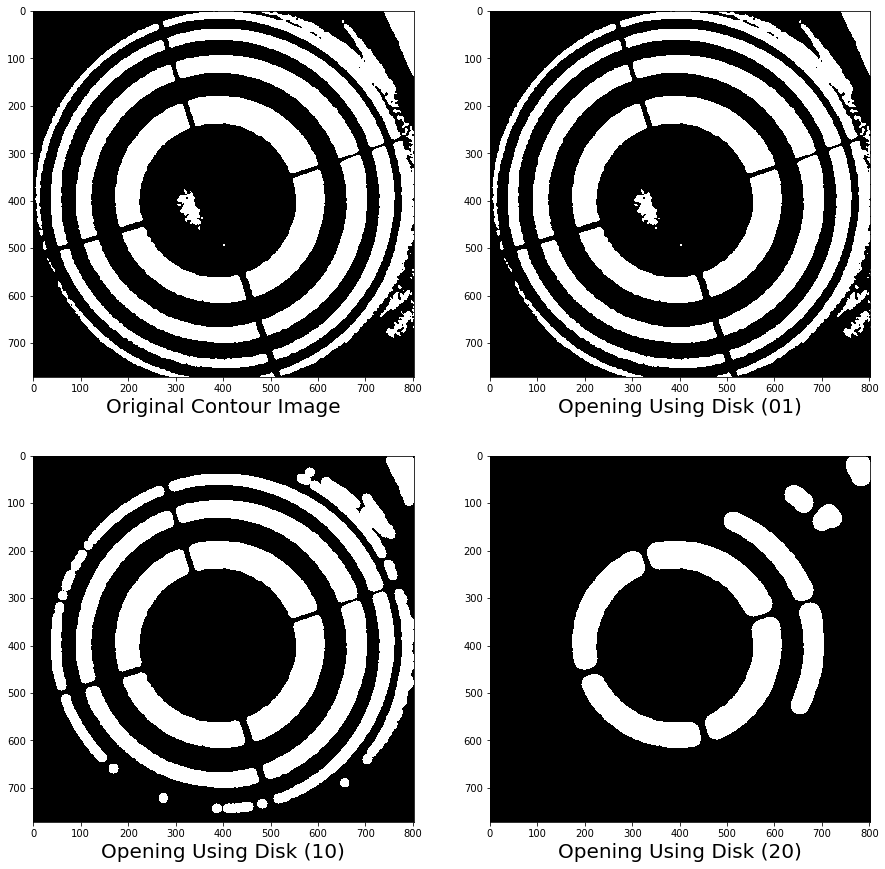

In [77]:
Binary_opening_disk_01=binary_opening(Contour_grey,selam_01)
Binary_opening_disk_10=binary_opening(Contour_grey,selam_10)
Binary_opening_disk_20=binary_opening(Contour_grey,selam_20)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Binary_opening_disk_01,cmap='gray')
ax2.imshow(Binary_opening_disk_10,cmap='gray')
ax3.imshow(Binary_opening_disk_20,cmap='gray')

ax0.set_xlabel('Original Contour Image',fontsize=20)
ax1.set_xlabel('Opening Using Disk (01)',fontsize=20)
ax2.set_xlabel('Opening Using Disk (10)',fontsize=20)
ax3.set_xlabel('Opening Using Disk (20)',fontsize=20)

** Q.1.4 Closing**

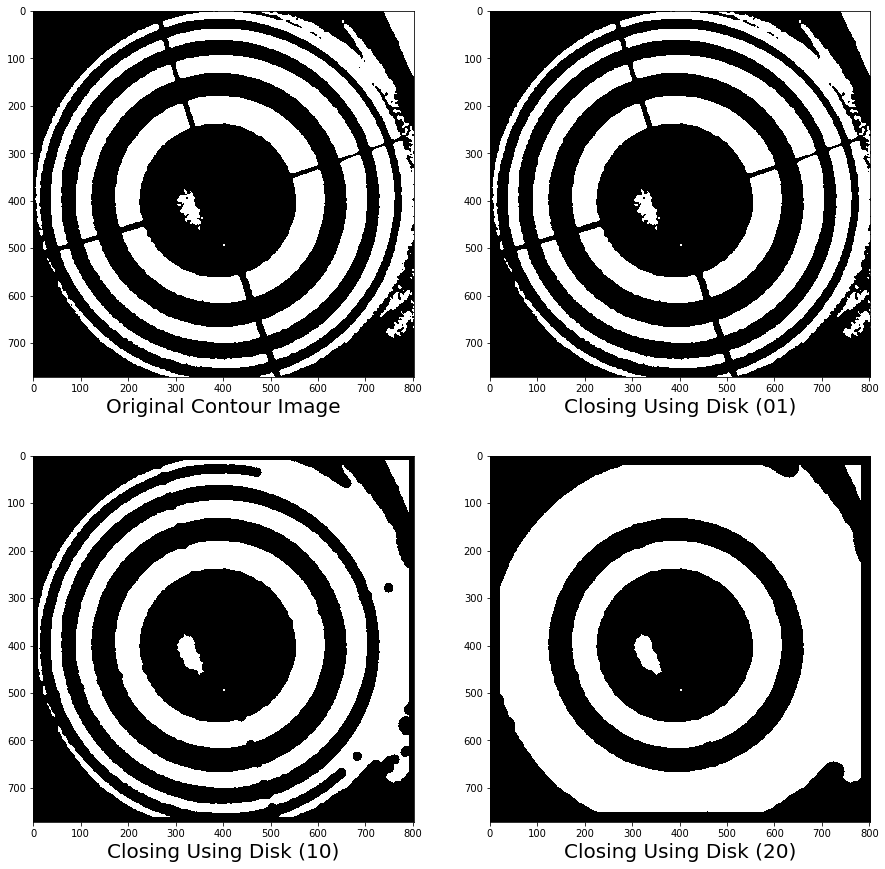

In [78]:
Binary_closing_disk_01=binary_closing(Contour_grey,selam_01)
Binary_closing_disk_10=binary_closing(Contour_grey,selam_10)
Binary_closing_disk_20=binary_closing(Contour_grey,selam_20)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Binary_closing_disk_01,cmap='gray')
ax2.imshow(Binary_closing_disk_10,cmap='gray')
ax3.imshow(Binary_closing_disk_20,cmap='gray')

ax0.set_xlabel('Original Contour Image',fontsize=20)
ax1.set_xlabel('Closing Using Disk (01)',fontsize=20)
ax2.set_xlabel('Closing Using Disk (10)',fontsize=20)
ax3.set_xlabel('Closing Using Disk (20)',fontsize=20)

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion and dilation are the two basic operator in the area of mathematical morphology. It is typically applied to binary images, but there are versions that work on grayscale images. The basic effect of the operator on a binary image is to erode away the boundaries of regions of foreground pixels (i.e. white pixels, typically). Thus areas of foreground pixels shrink in size, and holes within those areas become larger. Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image. In the morphological dilation and erosion operations, the state of any given pixel in the output image is determined by applying a rule to the corresponding pixel and its neighbors in the input image. Together with closing, the opening serves in image processing as a basic workhorse of morphological noise removal. Opening removes small objects from the foreground (usually taken as the bright pixels) of an image, placing them in the background, while closing removes small holes in the foreground, changing small islands of background into foreground. These techniques can also be used to find specific shapes in an image. Opening can be used to find things into which a specific structuring element can fit (edges, corners, etc).

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


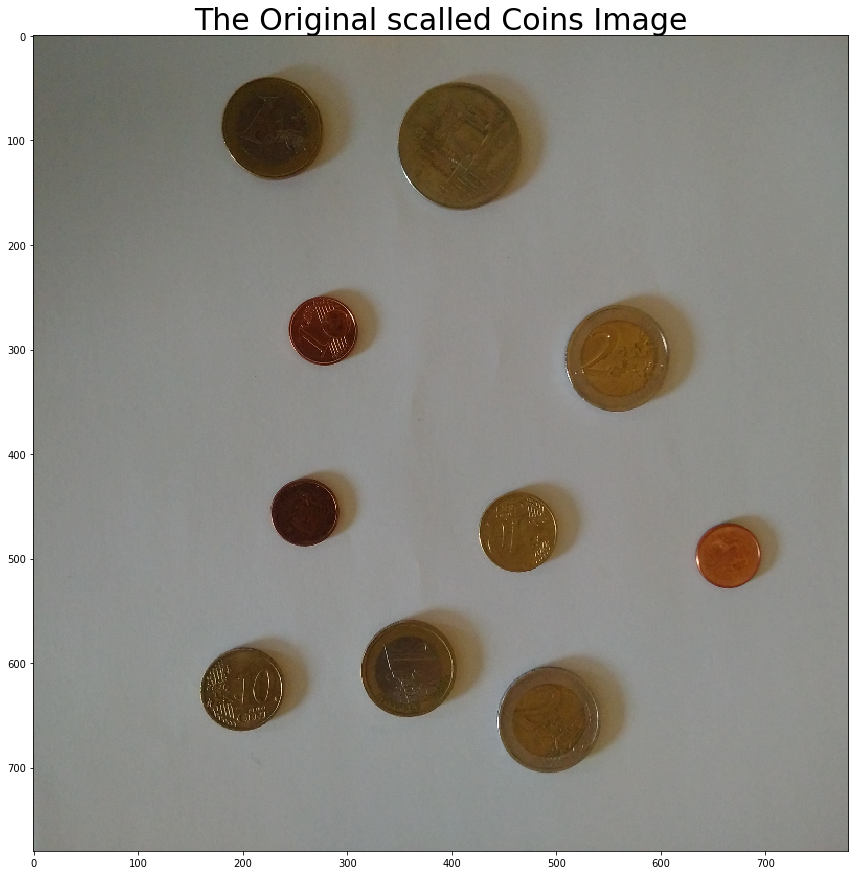

In [79]:
#import of the Coins's image from the devices
img_path = './images/'
img_name = 'coins.jpg'
Coins_grey_path = img_path.__add__(img_name)
CoinsImage = io.imread(Coins_grey_path)
CoinsImage= img_as_ubyte(CoinsImage)
ScaledCoins= rescale(CoinsImage,1.0 / 4.0)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax0= axes
ax0.imshow(ScaledCoins,cmap='gray')
ax0.set_title('The Original scalled Coins Image',fontsize=30)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

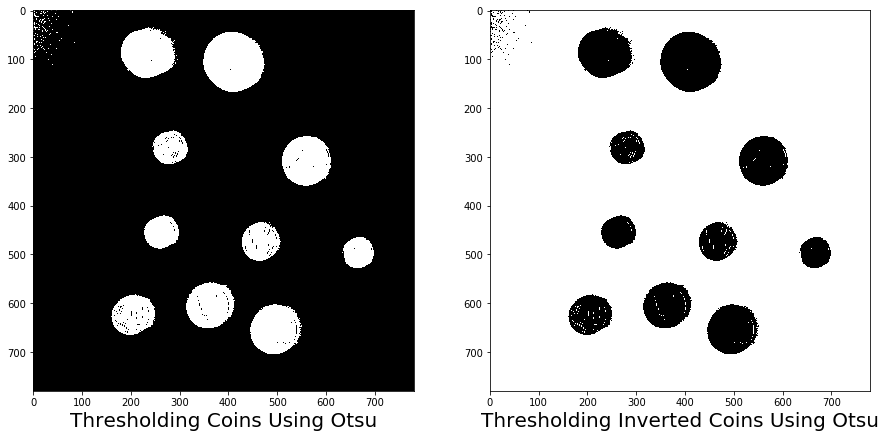

In [80]:
Gray_Coins= rgb2gray(ScaledCoins)
Threshold_coins= filters.threshold_otsu(Gray_Coins,nbins=256)
Output_Otsu_Coins = Gray_Coins <= Threshold_coins
Output_Otsu_Coins_Inverted=np.invert(Output_Otsu_Coins)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax0, ax1= axes.ravel()

ax0.imshow(Output_Otsu_Coins,cmap='gray')
ax1.imshow(Output_Otsu_Coins_Inverted,cmap='gray')

ax0.set_xlabel('Thresholding Coins Using Otsu',fontsize=20)
ax1.set_xlabel('Thresholding Inverted Coins Using Otsu',fontsize=20)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

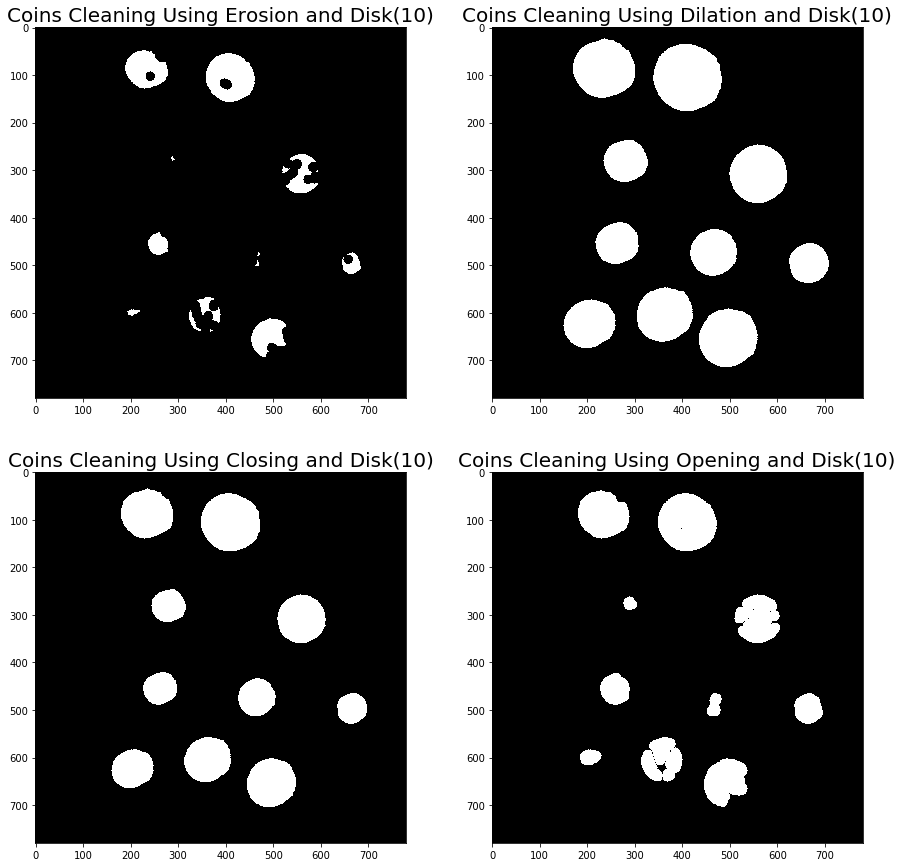

In [81]:
Cleaner=morphology.remove_small_objects(Output_Otsu_Coins, min_size=64, connectivity=1, in_place=False)
Clean_Erosion_disk_10=morphology.erosion(Cleaner,selam_10)
Clean_dilation_disk_10=morphology.dilation(Cleaner,selam_10)
Clean_closing_disk_10=morphology.closing(Cleaner,selam_10)
Clean_opening_disk_10=morphology.opening(Cleaner,selam_10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1,ax2,ax3 = axes.ravel()

ax0.imshow(Clean_Erosion_disk_10,cmap='gray')
ax1.imshow(Clean_dilation_disk_10,cmap='gray')
ax2.imshow(Clean_closing_disk_10,cmap='gray')
ax3.imshow(Clean_opening_disk_10,cmap='gray')

ax0.set_title('Coins Cleaning Using Erosion and Disk(10)',fontsize=20)
ax1.set_title('Coins Cleaning Using Dilation and Disk(10)',fontsize=20)
ax2.set_title('Coins Cleaning Using Closing and Disk(10)',fontsize=20)
ax3.set_title('Coins Cleaning Using Opening and Disk(10)',fontsize=20)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The Number of coins be:: =10
The New Number Will be:: =10
The Measured Diameter of the Coins Will be: =[106, 123, 70, 101, 69, 78, 64, 96, 85, 103]


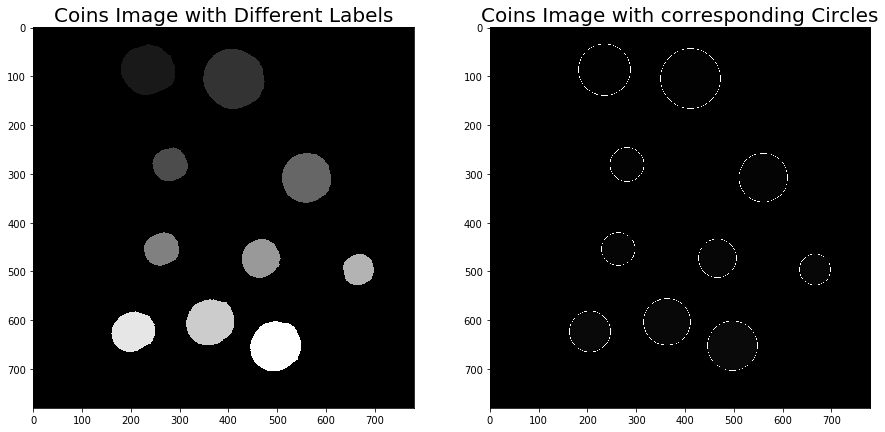

In [82]:
Coin_Image_Labels, Coin_Num_Regions = label(Clean_closing_disk_10, neighbors=None, background=0, return_num=True)
Output_Coin_Image_Labels, Coin_Num_Regions = label(Clean_closing_disk_10, neighbors=None, background=0, return_num=True)
print('The Number of coins be:: =' + str(Coin_Num_Regions))

Img_properties = regionprops(Output_Coin_Image_Labels)
a = 0
for i, regions in enumerate(Img_properties):
    r = regions
    if r.filled_area < 2660 or r.filled_area > 100000:
        continue
    a += 1
    point = r.centroid
    radius = r.equivalent_diameter / 2
    circle = circle_perimeter(int(point[0]), int(point[1]), int(radius))
    Output_Coin_Image_Labels[circle[0], circle[1]] = 255

print('The New Number Will be:: =' + str(a))

Measured_Properties = regionprops(Coin_Image_Labels)
Dia_of_Coins = [int(Iterator.equivalent_diameter) for Iterator in Measured_Properties]
print('The Measured Diameter of the Coins Will be: =' + str(Dia_of_Coins))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax0, ax1 = axes.ravel()

ax0.imshow(Coin_Image_Labels,cmap='gray')
ax1.imshow(Output_Coin_Image_Labels,cmap='gray')

ax0.set_title('Coins Image with Different Labels',fontsize=20)
ax1.set_title('Coins Image with corresponding Circles',fontsize=20)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

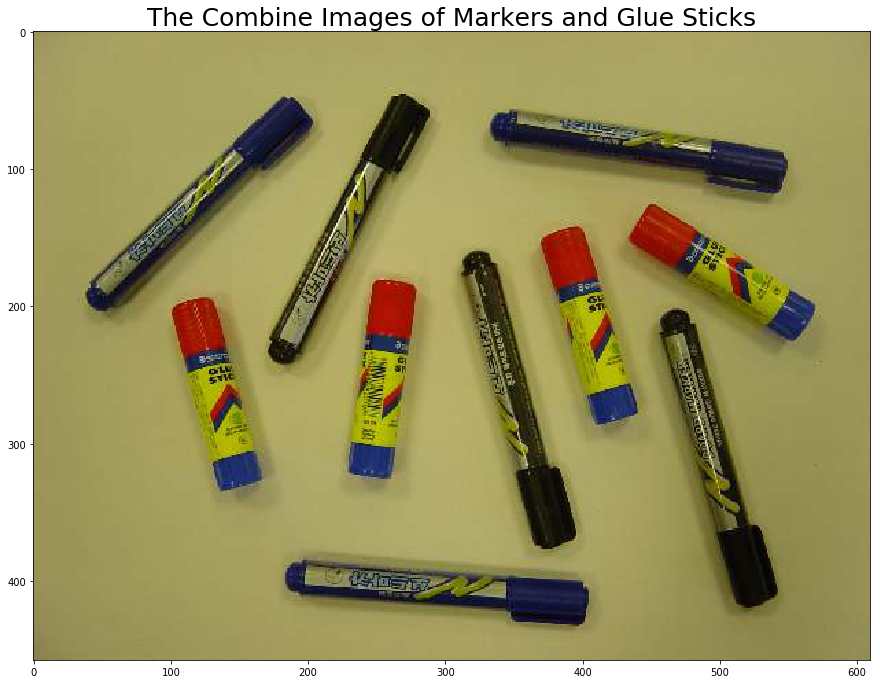

In [83]:
#import of the Coins's image from the devices
img_path = './images/'
img_name = 'objets4.jpg'
Marker_grey_path = img_path.__add__(img_name)
markerImage = io.imread(Marker_grey_path)
Marker_Glue_Image= img_as_ubyte(markerImage)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax0= axes
ax0.imshow(Marker_Glue_Image,cmap='gray')
ax0.set_title('The Combine Images of Markers and Glue Sticks',fontsize=25)

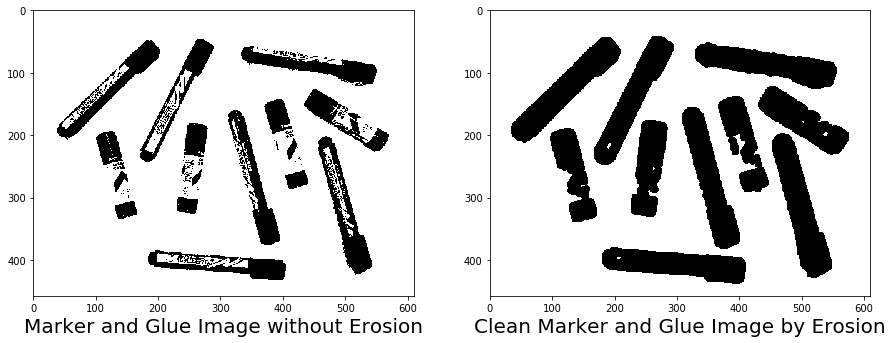

In [84]:
Gray_Marker_Glue_Images= rgb2gray(Marker_Glue_Image)
Threshold_Gray_Marker_Glue_Images= filters.threshold_otsu(Gray_Marker_Glue_Images,nbins=256)
Output_Otsu_Marker_Glue_Images = Gray_Marker_Glue_Images >= Threshold_Gray_Marker_Glue_Images

Clean_Output_Otsu_Marker_Glue_Images=erosion((erosion(Output_Otsu_Marker_Glue_Images, rectangle(5, 5))), selam_03)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax0, ax1= axes.ravel()

ax0.imshow(Output_Otsu_Marker_Glue_Images,cmap='gray')
ax1.imshow(Clean_Output_Otsu_Marker_Glue_Images,cmap='gray')

ax0.set_xlabel('Marker and Glue Image without Erosion',fontsize=20)
ax1.set_xlabel('Clean Marker and Glue Image by Erosion',fontsize=20)

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The total numbers of objects in the Marker and Glue Sticks Image will be: 10
The total numbers of Glue Sticks will be: 4
The total numbers of Marker will be: 6


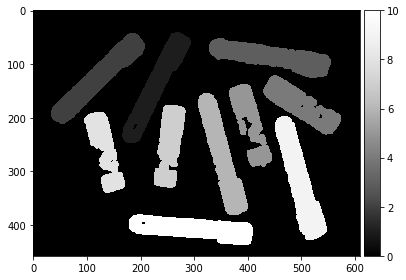

In [72]:
Marker_Glue_Images_Labels= label(Clean_Output_Otsu_Marker_Glue_Images, background = 1)
Region_Marker_Glue_Images_Labels = regionprops(Marker_Glue_Images_Labels)


io.imshow(img_obj_label, cmap = plt.cm.Greys_r)

Marker_Glue_Images_areas = np.array([Variables.convex_area for Variables in Region_Marker_Glue_Images_Labels])
Marker_Glue_Images_areas_mean=Marker_Glue_Images_areas.mean()
Marker_Glue_Images_Standard_Deviations = Marker_Glue_Images_areas - Marker_Glue_Images_areas_mean

print("The total numbers of objects in the Marker and Glue Sticks Image will be: {}".format(len(Region_Marker_Glue_Images_Labels)))
print("The total numbers of Glue Sticks will be: {}".format(len(np.where(Marker_Glue_Images_Standard_Deviations < 0)[0])))
print("The total numbers of Marker will be: {}".format(len(np.where(Marker_Glue_Images_Standard_Deviations >= 0)[0])))